In [25]:
# imports de base
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt


## Fonction pour charger l'image

In [34]:
def charge_img(chemin,size=(256,256)): # chemin designe le chemin (path) de l'image 
    img = Image.open(chemin) 
    img = img.resize(size)
    return np.array(img)

image2 = charge_img("image2.jpg")
print(image2.shape)
print(image2.dtype)

(256, 256, 3)
uint8


## Fonction pour afficher l'image

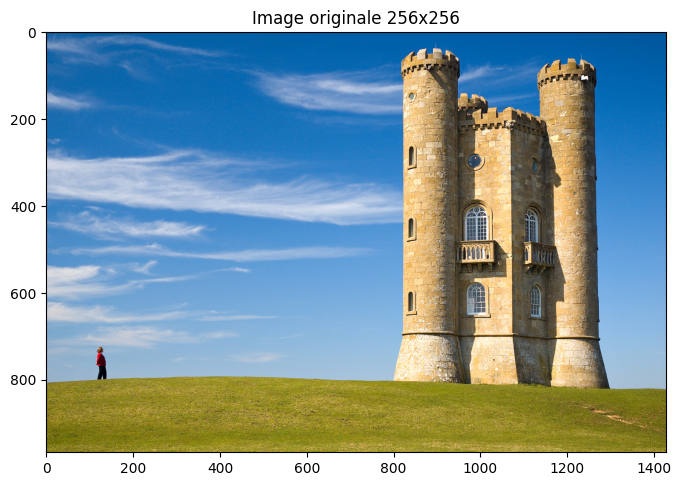

In [27]:
def affiche_img(image,title="Image"):
    plt.figure(figsize=(8,8))  # format 8 pouces pour avoir un carré bien parfait
    plt.imshow(image)
    plt.title(title)
    plt.axis('on')
    plt.show()

affiche_img(image2,"Image originale 256x256") 

### Verifier les pixels

In [28]:
print(image2[:3, :3])
print("\nDimensions:", image2.shape)
print("Hauteur:", image2.shape[0], "pixels")
print("Largeur:", image2.shape[1], "pixels")
#print("Canaux:", image2.shape[2])

[[[  0  93 157]
  [  8  93 158]
  [  6  94 158]]

 [[  1  95 159]
  [  2  91 159]
  [  5  95 157]]

 [[ 17  97 160]
  [ 11  94 160]
  [ 18  97 156]]]

Dimensions: (968, 1428, 3)
Hauteur: 968 pixels
Largeur: 1428 pixels


## Convertir une image rgb en gris
#### si l'image est déjà en gris pas besoin d'executer cette fonction

In [29]:
def rgb_to_gris(image):
    return np.dot(image[..., :3], [0.299, 0.587, 0.114]) # c'est une formule standart

In [30]:
def calcule_energie(image):
    gris = rgb_to_gris(image)
    dy,dx = np.gradient(gris.astype(float)) # float pour éviter les overflow
                                            # grad vertical (dy): différence entre pixels haut/bas
                                            # grad horizontal (dx): différence entre pixels gauche/droite
    energie = np.abs(dx) + np.abs(dy) # energie est la somme des valeurs absolue des gradients
    return energie

In [31]:

energie = calcule_energie(image2)
print(energie.shape)
print(f"Min énergie: {energie.min():.2f}, Max énergie: {energie.max():.2f}")

(968, 1428)
Min énergie: 0.00, Max énergie: 240.91


(np.float64(-0.5), np.float64(1427.5), np.float64(967.5), np.float64(-0.5))

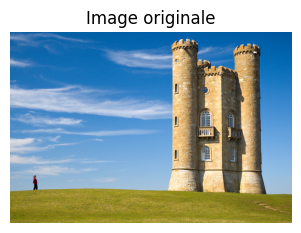

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image2)
plt.title("Image originale")
plt.axis('off')